In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\KİRA\Downloads\MY2010-2014 Fuel Consumption Ratings 5-cycle.csv")
df=df.iloc[:,:10]


In [3]:
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3


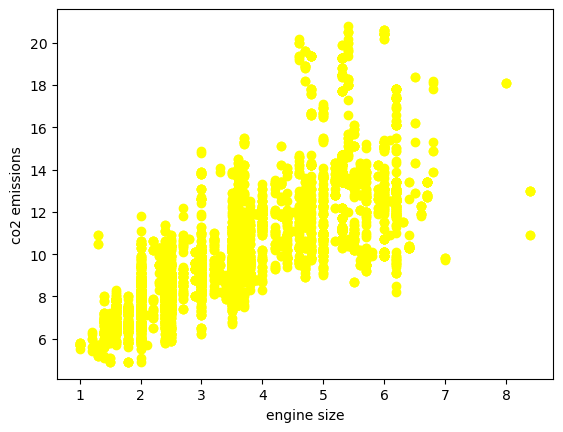

In [4]:
plt.scatter(df["ENGINE SIZE"],df["CO2 EMISSIONS "],color="yellow")
plt.xlabel("engine size")
plt.ylabel("co2 emissions")
plt.show()

In [5]:
mask=np.random.rand(len(df))<0.8
train=df[mask]
test=df[~mask]

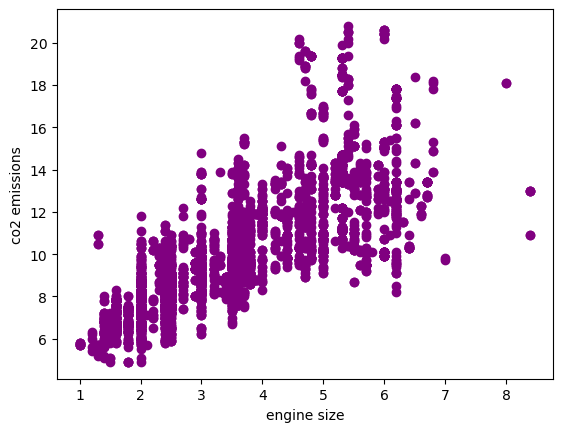

In [6]:
plt.scatter(train["ENGINE SIZE"],train["CO2 EMISSIONS "],color="purple")
plt.xlabel("engine size")
plt.ylabel("co2 emissions")
plt.show()

In [7]:
from sklearn import linear_model
regression=linear_model.LinearRegression()
x=np.asanyarray(train[["ENGINE SIZE","CYLINDERS","MODEL YEAR"]])
y=np.asanyarray(train[["CO2 EMISSIONS "]])
regression.fit(x,y)
print("coefficients:",regression.coef_)


coefficients: [[ 1.42579411  0.09904792 -0.10854065]]


In [8]:
from sklearn.metrics import r2_score


predictions=regression.predict(test[["ENGINE SIZE","CYLINDERS","MODEL YEAR"]])
test_y=np.asanyarray(test[["CO2 EMISSIONS "]])


c:\Yeniklasor3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [9]:
print("mean absolute error :%.2f" %np.mean(np.absolute(predictions-test_y)))
print("residual sum of squares:%.2f" %np.mean((predictions-test_y)**2))
print("variance score:%.2f" %r2_score(test_y,predictions))

mean absolute error :1.28
residual sum of squares:3.39
variance score:0.60
